# Distributor Sales Analysis
Mini Project - Data Analytics Portfolio

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel("distributor_sales.xlsx")
df

,Distributor ID,Distributor Name,Country,Product Code,Product,Sales Channel,Date Sold,Month Sold,Quantity,Unit Price,Revenue
0,23345,Devin Abbott,France,SUPA105,Super Soft Bulk - 2 Litres,Online,2012-08-29,8,208,14.50,3016.00
1,23278,Aphrodite Brennan,Malawi,SUPA105,Super Soft Bulk - 2 Litres,Direct,2012-08-24,8,197,14.50,2856.50
2,23303,Guinevere Key,Colombia,SUPA105,Super Soft Bulk - 2 Litres,Retail,2012-08-17,8,176,14.50,2552.00
3,23353,Zahir Fields,Canada,SUPA105,Super Soft Bulk - 2 Litres,Direct,2012-06-10,6,168,14.50,2436.00
4,23289,Deacon Craig,Mongolia,SUPA105,Super Soft Bulk - 2 Litres,Retail,2012-08-02,8,166,14.50,2407.00
...,...,...,...,...,...,...,...,...,...,...,...
102,23334,Silas Battle,Niue,PURA100,Pure Soft Detergent - 100ml,Online,2012-12-17,12,14,3.00,42.00
103,23285,Leonard Cardenas,Madagascar,SUPA102,Super Soft - 250ml,Retail,2012-07-24,7,9,4.50,40.50
104,23375,Brittany Burris,Palau,SUPA103,Super Soft - 500ml,Retail,2012-04-30,4,5,6.99,34.95
105,23336,Petra Mckenzie,Morocco,SUPA102,Super Soft - 250ml,Retail,2012-07-01,7,7,4.50,31.50


In [20]:
df["Date Sold"] = pd.to_datetime(df["Date Sold"])

df["Month"] = df["Date Sold"].dt.to_period("M")

df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")

In [21]:
revenue_by_distributor = (
    df.groupby("Distributor Name")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_product = (
    df.groupby("Product ")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_channel = (
    df.groupby("Sales Channel")["Revenue"]
    .sum()
)

revenue_by_month = (
    df.groupby("Month")["Revenue"]
    .sum()
    .reset_index()
)


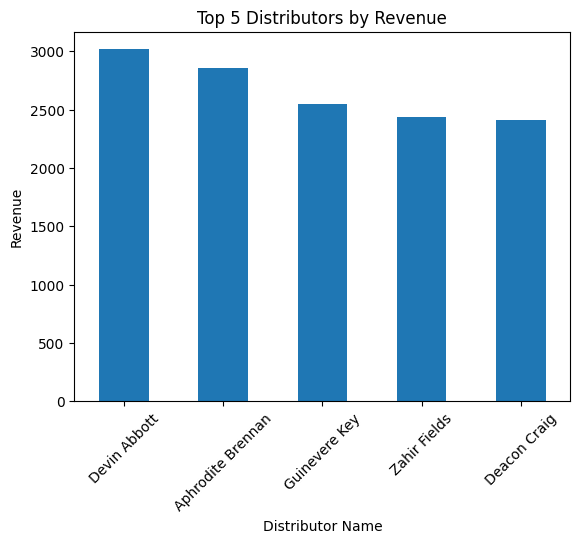

In [29]:
revenue_by_distributor.head(5).plot(kind="bar")
plt.title("Top 5 Distributors by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

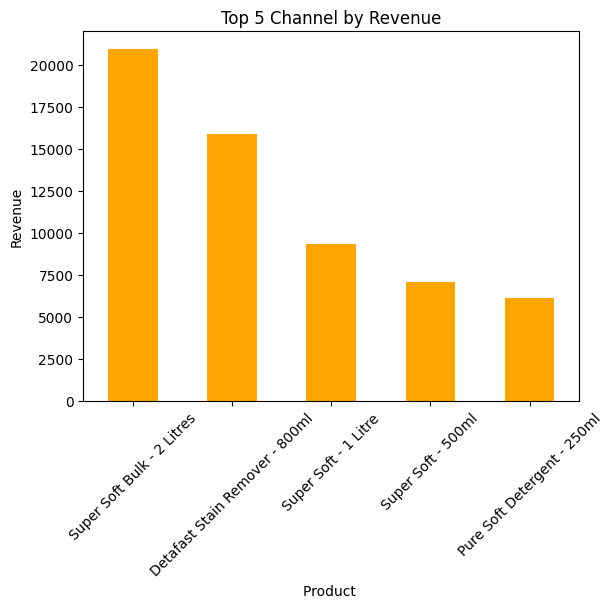

In [30]:
revenue_by_product.head(5).plot(kind="bar", color="orange")
plt.title("Top 5 Channel by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

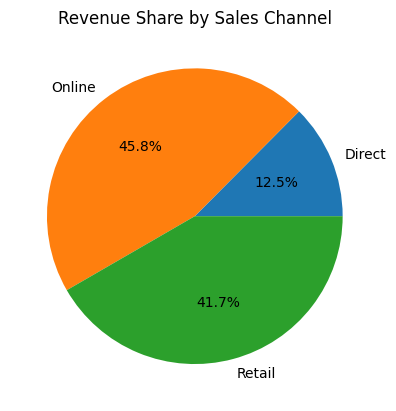

In [26]:
revenue_by_channel.plot(kind="pie", autopct="%1.1f%%")
plt.title("Revenue Share by Sales Channel")
plt.ylabel("")
plt.show()


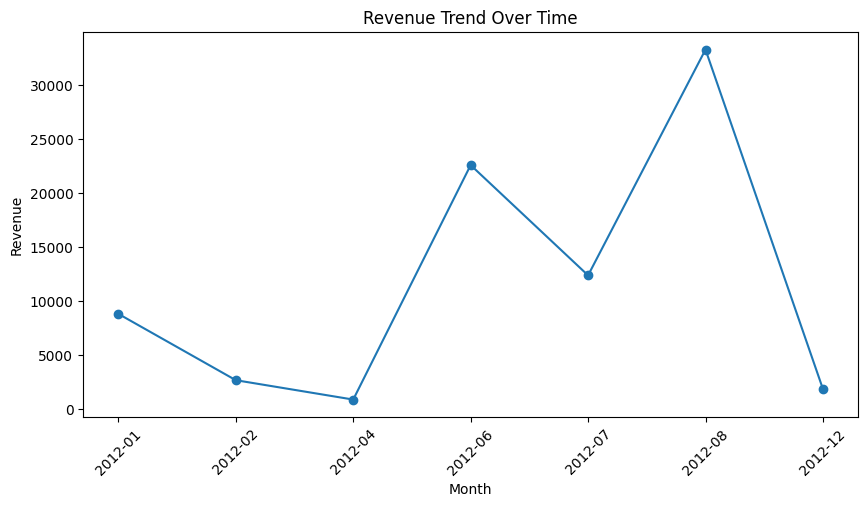

In [27]:
plt.figure(figsize=(10,5))
plt.plot(revenue_by_month["Month"].astype(str), revenue_by_month["Revenue"], marker="o")
plt.title("Revenue Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()
